# Task 3 - Modeling

This notebook will get you started by helping you to load the data, but then it'll be up to you to complete the task! If you need help, refer to the `modeling_walkthrough.ipynb` notebook.


## Section 1 - Setup

First, we need to mount this notebook to our Google Drive folder, in order to access the CSV data file. If you haven't already, watch this video https://www.youtube.com/watch?v=woHxvbBLarQ to help you mount your Google Drive folder.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


We want to use dataframes once again to store and manipulate the data.

In [ ]:
!pip install pandas

In [2]:
import pandas as pd

---

## Section 2 - Data loading

Similar to before, let's load our data from Google Drive for the 3 datasets provided. Be sure to upload the datasets into Google Drive, so that you can access them here.

In [3]:
sales_df = pd.read_csv(f"/content/drive/MyDrive/sales.csv")
sales_df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
sales_df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [4]:
sales_df['timestamp']=pd.to_datetime(sales_df.timestamp)

In [5]:
stock_df = pd.read_csv(f"/content/drive/MyDrive/sensor_stock_levels.csv")
stock_df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
stock_df.head()

,id,timestamp,product_id,estimated_stock_pct
0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 12:13:02,f658605e-75f3-4fed-a655-c0903f344427,0.75
1,f2612b26-fc82-49ea-8940-0751fdd4d9ef,2022-03-07 16:39:46,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48
2,989a287f-67e6-4478-aa49-c3a35dac0e2e,2022-03-01 18:17:43,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,0.58
3,af8e5683-d247-46ac-9909-1a77bdebefb2,2022-03-02 14:29:09,c21e3ba9-92a3-4745-92c2-6faef73223f7,0.79
4,08a32247-3f44-4002-85fb-c198434dd4bb,2022-03-02 13:46:18,7f478817-aa5b-44e9-9059-8045228c9eb0,0.22


In [6]:
stock_df['timestamp']=pd.to_datetime(stock_df.timestamp)

In [8]:
temp_df = pd.read_csv("/content/drive/MyDrive/sensor_storage_temperature.csv")
temp_df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
temp_df.head()

,id,timestamp,temperature
0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:55:20,2.96
1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:18:22,1.88
2,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,2022-03-04 15:12:26,1.78
3,9500357b-ce15-424a-837a-7677b386f471,2022-03-02 12:30:42,2.18
4,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,2022-03-05 09:09:33,1.38


In [9]:
temp_df['timestamp']=pd.to_datetime(temp_df.timestamp)

In [10]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23890 entries, 0 to 23889
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           23890 non-null  object        
 1   timestamp    23890 non-null  datetime64[ns]
 2   temperature  23890 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 560.0+ KB


In [11]:
from datetime import datetime

# Format the datetime column to include only date and hour
sales_df['timestamp'] = sales_df['timestamp'].apply(lambda x: x.strftime('%Y-%m-%d %H'))

stock_df['timestamp'] = stock_df['timestamp'].apply(lambda x: x.strftime('%Y-%m-%d %H'))

temp_df['timestamp'] = temp_df['timestamp'].apply(lambda x: x.strftime('%Y-%m-%d %H'))

# Output the modified DataFrame
print(sales_df)

                            transaction_id      timestamp  \
0     a1c82654-c52c-45b3-8ce8-4c2a1efe63ed  2022-03-02 09   
1     931ad550-09e8-4da6-beaa-8c9d17be9c60  2022-03-06 10   
2     ae133534-6f61-4cd6-b6b8-d1c1d8d90aea  2022-03-04 17   
3     157cebd9-aaf0-475d-8a11-7c8e0f5b76e4  2022-03-02 17   
4     a81a6cd3-5e0c-44a2-826c-aea43e46c514  2022-03-05 14   
...                                    ...            ...   
7824  6c19b9fc-f86d-4526-9dfe-d8027a4d13ee  2022-03-03 18   
7825  1c69824b-e399-4b79-a5e7-04a3a7db0681  2022-03-04 19   
7826  79aee7d6-1405-4345-9a15-92541e9e1e74  2022-03-03 14   
7827  e5cc4f88-e5b7-4ad5-bc1b-12a828a14f55  2022-03-04 15   
7828  afd70b4f-ee21-402d-8d8f-0d9e13c2bea6  2022-03-06 13   

                                product_id           category customer_type  \
0     3bc6c1ea-0198-46de-9ffd-514ae3338713              fruit          gold   
1     ad81b46c-bf38-41cf-9b54-5fe7f5eba93e              fruit      standard   
2     7c55cbd4-f306-4c04-a030-

Now it's up to you, refer back to the steps in your strategic plan to complete this task. Good luck!

In [12]:
df3 = pd.merge(sales_df, stock_df, on=["product_id", 'timestamp'])
df3

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type,id,estimated_stock_pct
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet,2d4c0203-7e6f-4590-af4a-f5de4522d243,0.37
1,c7efb312-1956-4185-875a-cd6c3714e127,2022-03-02 09,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,premium,3.99,3,11.97,credit card,2d4c0203-7e6f-4590-af4a-f5de4522d243,0.37
2,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet,f7991fb1-676c-463d-aba4-e4246e8a8806,0.63
3,82bd6918-873d-4afc-a80a-26fa516b8552,2022-03-06 10,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,gold,3.99,4,15.96,debit card,f7991fb1-676c-463d-aba4-e4246e8a8806,0.63
4,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet,577f1fe5-f9b0-49e9-8aae-3dc6a49a14c4,0.29
...,...,...,...,...,...,...,...,...,...,...,...
5634,abad87e6-5424-40cb-832d-afe5195fc3f2,2022-03-07 13,f4a73cc3-b383-4650-bfa5-970bdcadc737,cleaning products,premium,14.19,3,42.57,credit card,de306735-9213-4ece-96d6-a1085f29b3ac,0.87
5635,1c69824b-e399-4b79-a5e7-04a3a7db0681,2022-03-04 19,707e4237-191c-4cc9-85af-383a6c1cb2ab,cleaning products,standard,16.99,1,16.99,credit card,dd104add-5a4d-4fc1-9384-b3f89a28e1a7,0.99
5636,e5cc4f88-e5b7-4ad5-bc1b-12a828a14f55,2022-03-04 15,707e4237-191c-4cc9-85af-383a6c1cb2ab,cleaning products,basic,16.99,4,67.96,cash,3159b8b6-781a-4866-b873-27ed7dcdb77d,0.33
5637,afd70b4f-ee21-402d-8d8f-0d9e13c2bea6,2022-03-06 13,d6ccd088-11be-4c25-aa1f-ea87c01a04db,cleaning products,non-member,14.99,4,59.96,debit card,218b5b3d-f15e-4715-b35b-aee3847754cc,0.02


In [13]:
df4 = pd.merge(df3, temp_df, on="timestamp")
df4

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type,id_x,estimated_stock_pct,id_y,temperature
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet,2d4c0203-7e6f-4590-af4a-f5de4522d243,0.37,70051222-303f-40d1-b3a7-2a3f1ccd30b1,0.62
1,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet,2d4c0203-7e6f-4590-af4a-f5de4522d243,0.37,7787343a-1194-4c80-ac1d-7a111060f7f8,31.24
2,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet,2d4c0203-7e6f-4590-af4a-f5de4522d243,0.37,8ec85ca4-680d-47db-9e0b-171acc5410c1,2.20
3,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet,2d4c0203-7e6f-4590-af4a-f5de4522d243,0.37,68a50e89-9e35-40aa-a04c-373831e8e01f,-2.50
4,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet,2d4c0203-7e6f-4590-af4a-f5de4522d243,0.37,37667f09-db12-4e0a-aeb6-a3062b4aa889,-3.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1747647,1c69824b-e399-4b79-a5e7-04a3a7db0681,2022-03-04 19,707e4237-191c-4cc9-85af-383a6c1cb2ab,cleaning products,standard,16.99,1,16.99,credit card,dd104add-5a4d-4fc1-9384-b3f89a28e1a7,0.99,1dc9943e-e42b-436d-89eb-234bbc546486,-2.62
1747648,1c69824b-e399-4b79-a5e7-04a3a7db0681,2022-03-04 19,707e4237-191c-4cc9-85af-383a6c1cb2ab,cleaning products,standard,16.99,1,16.99,credit card,dd104add-5a4d-4fc1-9384-b3f89a28e1a7,0.99,5c9e90fe-9da8-43f9-9b39-f974761d29ad,-23.14
1747649,1c69824b-e399-4b79-a5e7-04a3a7db0681,2022-03-04 19,707e4237-191c-4cc9-85af-383a6c1cb2ab,cleaning products,standard,16.99,1,16.99,credit card,dd104add-5a4d-4fc1-9384-b3f89a28e1a7,0.99,ac651dd0-f3c4-4950-a1f4-6c248a8fbe87,2.84
1747650,1c69824b-e399-4b79-a5e7-04a3a7db0681,2022-03-04 19,707e4237-191c-4cc9-85af-383a6c1cb2ab,cleaning products,standard,16.99,1,16.99,credit card,dd104add-5a4d-4fc1-9384-b3f89a28e1a7,0.99,4c21b034-5945-4f2d-bd4f-83427bfe87a8,-30.89


In [14]:
df4 = df4.drop(['transaction_id','customer_type','unit_price','payment_type','id_x','id_y'],axis='columns')
df4

,timestamp,product_id,category,quantity,total,estimated_stock_pct,temperature
0,2022-03-02 09,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,2,7.98,0.37,0.62
1,2022-03-02 09,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,2,7.98,0.37,31.24
2,2022-03-02 09,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,2,7.98,0.37,2.20
3,2022-03-02 09,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,2,7.98,0.37,-2.50
4,2022-03-02 09,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,2,7.98,0.37,-3.05
...,...,...,...,...,...,...,...
1747647,2022-03-04 19,707e4237-191c-4cc9-85af-383a6c1cb2ab,cleaning products,1,16.99,0.99,-2.62
1747648,2022-03-04 19,707e4237-191c-4cc9-85af-383a6c1cb2ab,cleaning products,1,16.99,0.99,-23.14
1747649,2022-03-04 19,707e4237-191c-4cc9-85af-383a6c1cb2ab,cleaning products,1,16.99,0.99,2.84
1747650,2022-03-04 19,707e4237-191c-4cc9-85af-383a6c1cb2ab,cleaning products,1,16.99,0.99,-30.89


In [15]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1747652 entries, 0 to 1747651
Data columns (total 7 columns):
 #   Column               Dtype  
---  ------               -----  
 0   timestamp            object 
 1   product_id           object 
 2   category             object 
 3   quantity             int64  
 4   total                float64
 5   estimated_stock_pct  float64
 6   temperature          float64
dtypes: float64(3), int64(1), object(3)
memory usage: 106.7+ MB


In [16]:
df4 = df4.fillna(0)
df4

,timestamp,product_id,category,quantity,total,estimated_stock_pct,temperature
0,2022-03-02 09,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,2,7.98,0.37,0.62
1,2022-03-02 09,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,2,7.98,0.37,31.24
2,2022-03-02 09,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,2,7.98,0.37,2.20
3,2022-03-02 09,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,2,7.98,0.37,-2.50
4,2022-03-02 09,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,2,7.98,0.37,-3.05
...,...,...,...,...,...,...,...
1747647,2022-03-04 19,707e4237-191c-4cc9-85af-383a6c1cb2ab,cleaning products,1,16.99,0.99,-2.62
1747648,2022-03-04 19,707e4237-191c-4cc9-85af-383a6c1cb2ab,cleaning products,1,16.99,0.99,-23.14
1747649,2022-03-04 19,707e4237-191c-4cc9-85af-383a6c1cb2ab,cleaning products,1,16.99,0.99,2.84
1747650,2022-03-04 19,707e4237-191c-4cc9-85af-383a6c1cb2ab,cleaning products,1,16.99,0.99,-30.89


In [17]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1747652 entries, 0 to 1747651
Data columns (total 7 columns):
 #   Column               Dtype  
---  ------               -----  
 0   timestamp            object 
 1   product_id           object 
 2   category             object 
 3   quantity             int64  
 4   total                float64
 5   estimated_stock_pct  float64
 6   temperature          float64
dtypes: float64(3), int64(1), object(3)
memory usage: 106.7+ MB


In [18]:
from sklearn.preprocessing import LabelEncoder
products = LabelEncoder()
categories = LabelEncoder()
df4['product_id'] = products.fit_transform(df4['product_id'])
df4['category'] = categories.fit_transform(df4['category'])

In [19]:
df4

,timestamp,product_id,category,quantity,total,estimated_stock_pct,temperature
0,2022-03-02 09,90,10,2,7.98,0.37,0.62
1,2022-03-02 09,90,10,2,7.98,0.37,31.24
2,2022-03-02 09,90,10,2,7.98,0.37,2.20
3,2022-03-02 09,90,10,2,7.98,0.37,-2.50
4,2022-03-02 09,90,10,2,7.98,0.37,-3.05
...,...,...,...,...,...,...,...
1747647,2022-03-04 19,149,6,1,16.99,0.99,-2.62
1747648,2022-03-04 19,149,6,1,16.99,0.99,-23.14
1747649,2022-03-04 19,149,6,1,16.99,0.99,2.84
1747650,2022-03-04 19,149,6,1,16.99,0.99,-30.89


In [20]:
df4=df4.set_index('timestamp')

In [21]:
df4.columns

Index(['product_id', 'category', 'quantity', 'total', 'estimated_stock_pct',
       'temperature'],
      dtype='object')

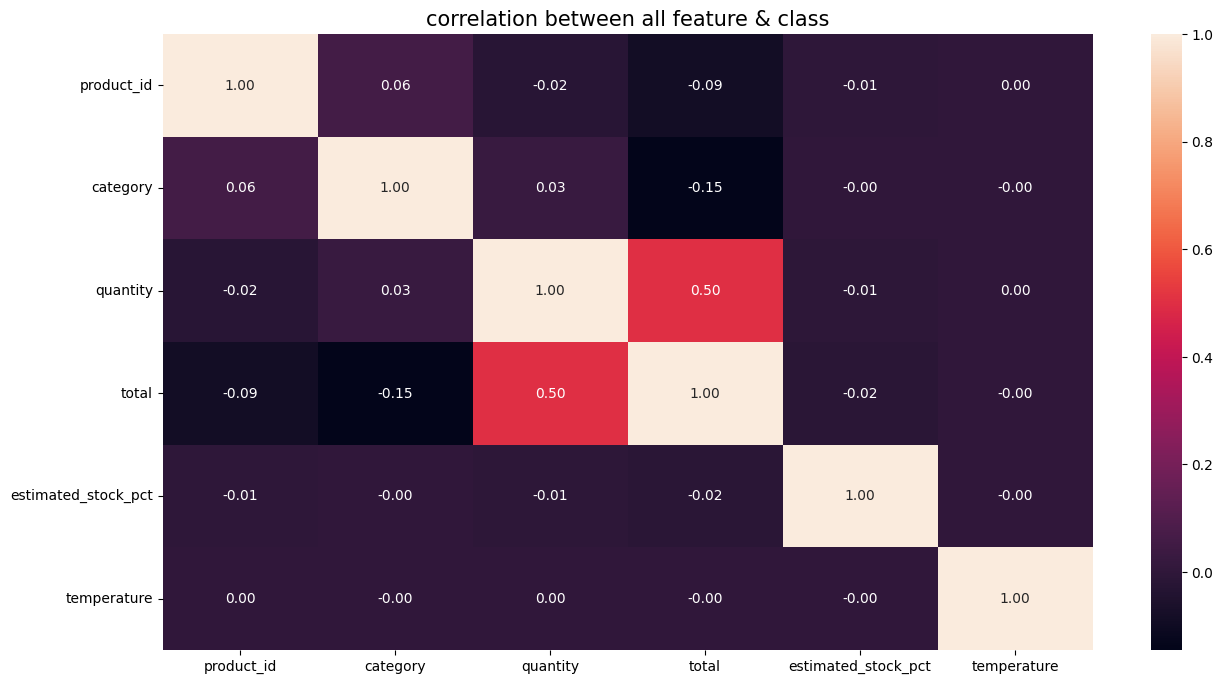

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

#correlation between all feature & class
plt.figure(figsize=(15,8))

sns.heatmap(df4.corr(), annot=True, fmt='0.2f');


plt.title('correlation between all feature & class',fontsize=15)

plt.show()

**predictive model on the estimated_stock**

In [23]:
x = df4.drop('estimated_stock_pct',axis='columns')
y = df4.estimated_stock_pct

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
#models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoLars
from sklearn.linear_model import BayesianRidge
from sklearn.neighbors import NearestCentroid
from xgboost import XGBRegressor

In [25]:
# split data train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20, random_state=32)

In [26]:
models = {
    "LinearRegression": LinearRegression(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "SVR": SVR(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "LassoLars": LassoLars(),
    "BayesianRidge": BayesianRidge(),
    "XGB": XGBRegressor(),
}

In [29]:
modelss = {
    "LinearRegression": LinearRegression(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "LassoLars": LassoLars(),
    "BayesianRidge": BayesianRidge(),
    "XGB": XGBRegressor(),
}

In [30]:
for name, model in modelss.items():
    print(f'Training Model {name} \n--------------')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'mean_absolute_error :{mean_absolute_error(y_test, y_pred)}')
    print(f'mean_squared_error :{mean_squared_error(y_test, y_pred)}')
    print('-'*30)

Training Model LinearRegression 
--------------
mean_absolute_error :0.24744559777914385
mean_squared_error :0.08259411677392171
------------------------------
Training Model DecisionTreeRegressor 
--------------
mean_absolute_error :0.24011644487750156
mean_squared_error :0.09766884545170523
------------------------------
Training Model Lasso 
--------------
mean_absolute_error :0.24752548206820316
mean_squared_error :0.08262704381176467
------------------------------
Training Model Ridge 
--------------
mean_absolute_error :0.24744559777950162
mean_squared_error :0.08259411677404735
------------------------------
Training Model LassoLars 
--------------
mean_absolute_error :0.24752548206820316
mean_squared_error :0.08262704381176467
------------------------------
Training Model BayesianRidge 
--------------
mean_absolute_error :0.2474456585165062
mean_squared_error :0.08259413810671785
------------------------------
Training Model XGB 
--------------
mean_absolute_error :0.2179375473

In [32]:
model.score(x,y)

0.18373871406741793

In [33]:
import pickle

In [34]:
with open('model_pickle','wb') as file: # write binary
    pickle.dump(model,file)